In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from umap import UMAP
import plotly.express as px

In [2]:
dist_matrix = pd.read_csv("../matrix_identity.csv")

In [3]:
dist_matrix

0         1         2         3         4         5         6  \
0    0.000000  0.822967  0.829346  0.813397  0.816587  0.824561  0.810207   
1    0.822967  0.000000  0.867624  0.850080  0.866029  0.864434  0.846890   
2    0.829346  0.867624  0.000000  0.858054  0.867624  0.866029  0.835726   
3    0.813397  0.850080  0.858054  0.000000  0.958533  0.940989  0.830941   
4    0.816587  0.866029  0.867624  0.958533  0.000000  0.955343  0.830941   
..        ...       ...       ...       ...       ...       ...       ...   
247  0.816587  0.838915  0.830941  0.824561  0.832536  0.832536  0.813397   
248  0.816587  0.822967  0.824561  0.830941  0.829346  0.830941  0.822967   
249  0.826156  0.832536  0.837321  0.829346  0.830941  0.838915  0.811802   
250  0.818182  0.829346  0.827751  0.826156  0.826156  0.826156  0.811802   
251  0.740032  0.746411  0.749601  0.749601  0.751196  0.755981  0.748006   

            7         8         9  ...       242       243       244  \
0    0.819777  0.816587  0.811802  ...  0.805423  0.794258  0.792663   
1    0.878788  0.848485  0.851675  ...  0.830941  0.814992  0.821372   
2    0.866029  0.846890  0.853270  ...  0.813397  0.810207  0.814992   
3    0.862839  0.850080  0.850080  ...  0.814992  0.805423  0.814992   
4    0.864434  0.856459  0.851675  ...  0.816587  0.814992  0.819777   
..        ...       ...       ...  ...       ...       ...       ...   
247  0.829346  0.813397  0.813397  ...  0.813397  0.813397  0.805423   
248  0.835726  0.822967  0.813397  ...  0.810207  0.811802  0.810207   
249  0.824561  0.822967  0.816587  ...  0.816587  0.805423  0.803828   
250  0.824561  0.810207  0.818182  ...  0.814992  0.803828  0.813397   
251  0.749601  0.754386  0.755981  ...  0.749601  0.751196  0.748006   

          245       246       247       248       249       250       251  
0    0.792663  0.787879  0.816587  0.816587  0.826156  0.818182  0.740032  
1    0.816587  0.810207  0.838915  0.822967  0.832536  0.829346  0.746411  
2    0.810207  0.803828  0.830941  0.824561  0.837321  0.827751  0.749601  
3    0.808612  0.808612  0.824561  0.830941  0.829346  0.826156  0.749601  
4    0.811802  0.813397  0.832536  0.829346  0.830941  0.826156  0.751196  
..        ...       ...       ...       ...       ...       ...       ...  
247  0.803828  0.814992  0.000000  0.861244  0.894737  0.869219  0.743222  
248  0.800638  0.805423  0.861244  0.000000  0.881978  0.859649  0.751196  
249  0.802233  0.803828  0.894737  0.881978  0.000000  0.881978  0.755981  
250  0.803828  0.808612  0.869219  0.859649  0.881978  0.000000  0.746411  
251  0.744817  0.789474  0.743222  0.751196  0.755981  0.746411  0.000000  

[252 rows x 252 columns]

In [4]:
colour = pd.read_csv("../examples/globins/globin_colors_new.csv")

In [5]:
colour

proteins_id  tree1  tree2  tree3  tree4                full_name  \
0              1      5      3      3      2       Globin C, coelomic   
1              2     -1     28     18     10        Globin (Fragment)   
2              3     -1     27     18     10  Uncharacterized protein   
3              4     37     27     18     10  Uncharacterized protein   
4              5     37     27     18     10  Uncharacterized protein   
..           ...    ...    ...    ...    ...                      ...   
247          248     14     10      9      3  Uncharacterized protein   
248          249     -1     10      9      3  Uncharacterized protein   
249          250     14     10      9      3  Uncharacterized protein   
250          251     14     10      9      3  Uncharacterized protein   
251          252     -1     25     15      8  Uncharacterized protein   

          short_name                   full_species       short_species  \
0             Globin              Caudina arenicola             Caudina   
1             Globin          Stegodyphus mimosarum         Stegodyphus   
2    Uncharacterized             Strigamia maritima           Strigamia   
3    Uncharacterized                Scylla olivacea              Scylla   
4    Uncharacterized                Scylla olivacea              Scylla   
..               ...                            ...                 ...   
247  Uncharacterized  Strongylocentrotus purpuratus  Strongylocentrotus   
248  Uncharacterized  Strongylocentrotus purpuratus  Strongylocentrotus   
249  Uncharacterized  Strongylocentrotus purpuratus  Strongylocentrotus   
250  Uncharacterized  Strongylocentrotus purpuratus  Strongylocentrotus   
251  Uncharacterized      Strongyloides stercoralis       Strongyloides   

     evo_distance  Color_species     Domain  Kingdom         Phylum  \
0        2.101128  Echinodermata  Eukaryota  Metazoa  Echinodermata   
1        1.757280     Arthropoda  Eukaryota  Metazoa     Arthropoda   
2        2.041487     Arthropoda  Eukaryota  Metazoa     Arthropoda   
3        2.318169     Arthropoda  Eukaryota  Metazoa     Arthropoda   
4        2.170775     Arthropoda  Eukaryota  Metazoa     Arthropoda   
..            ...            ...        ...      ...            ...   
247      2.586926  Echinodermata  Eukaryota  Metazoa  Echinodermata   
248      2.519191  Echinodermata  Eukaryota  Metazoa  Echinodermata   
249      2.276065  Echinodermata  Eukaryota  Metazoa  Echinodermata   
250      2.867471  Echinodermata  Eukaryota  Metazoa  Echinodermata   
251      3.192954       Nematoda  Eukaryota  Metazoa       Nematoda   

       Subphylum         Class               Genus  
0          Other         Other               Other  
1    Chelicerata     Arachnida               Other  
2          Other         Other               Other  
3      Crustacea  Malacostraca               Other  
4      Crustacea  Malacostraca               Other  
..           ...           ...                 ...  
247        Other    Echinoidea  Strongylocentrotus  
248        Other    Echinoidea  Strongylocentrotus  
249        Other    Echinoidea  Strongylocentrotus  
250        Other    Echinoidea  Strongylocentrotus  
251        Other   Chromadorea               Other  

[252 rows x 17 columns]

## T-sne

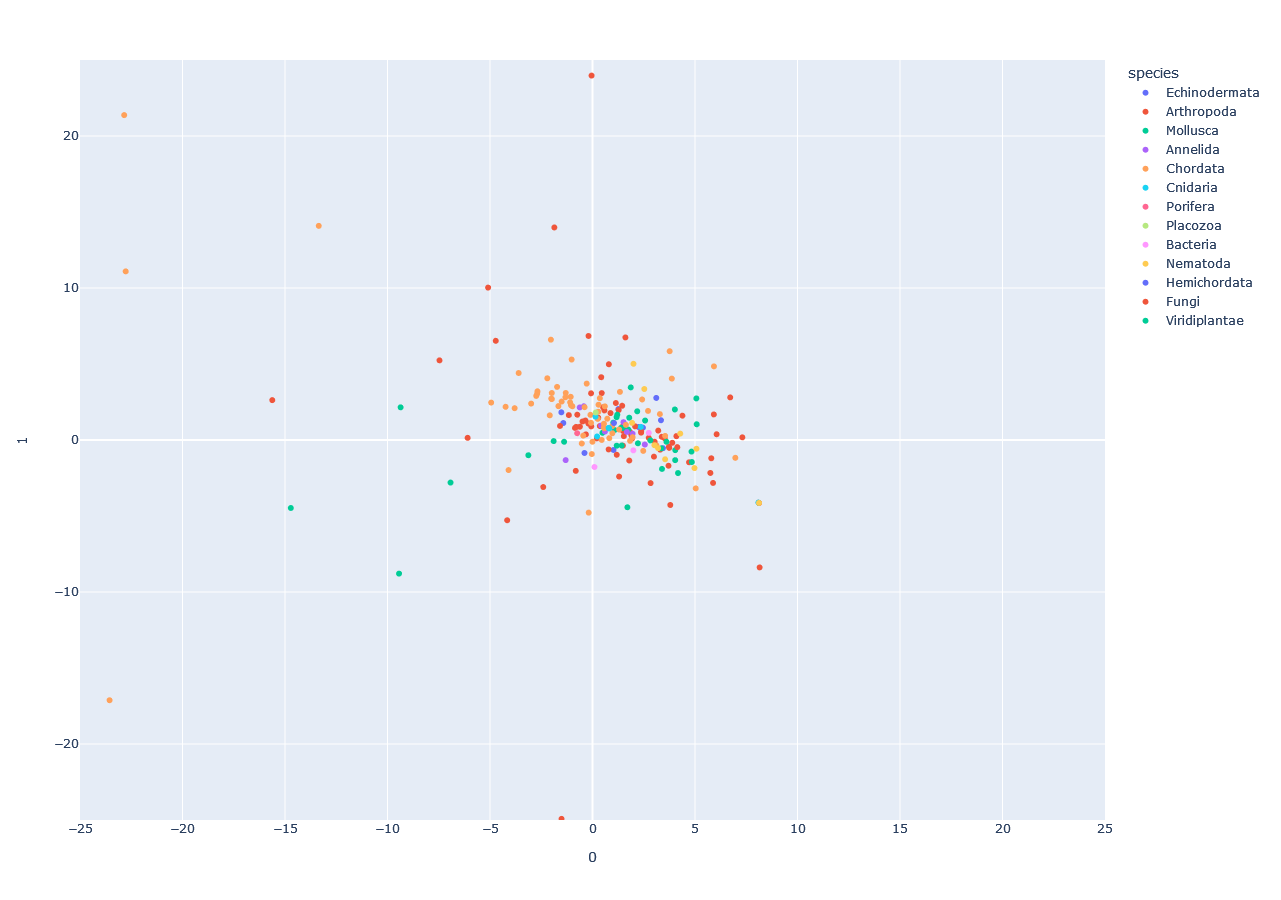

In [6]:
# component = 2 car on veut 2 dimensions
tsne_2d = TSNE(n_components=2, random_state=0)
proj_tsne_dist_2d = tsne_2d.fit_transform(dist_matrix)

tsne_dist_2d = px.scatter(
    proj_tsne_dist_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)
tsne_dist_2d.update_layout(xaxis_range=[-25, 25], yaxis_range=[-25, 25])
tsne_dist_2d.update_layout(width=1000, height=900)
tsne_dist_2d.update_xaxes(dtick=5)
tsne_dist_2d.show()

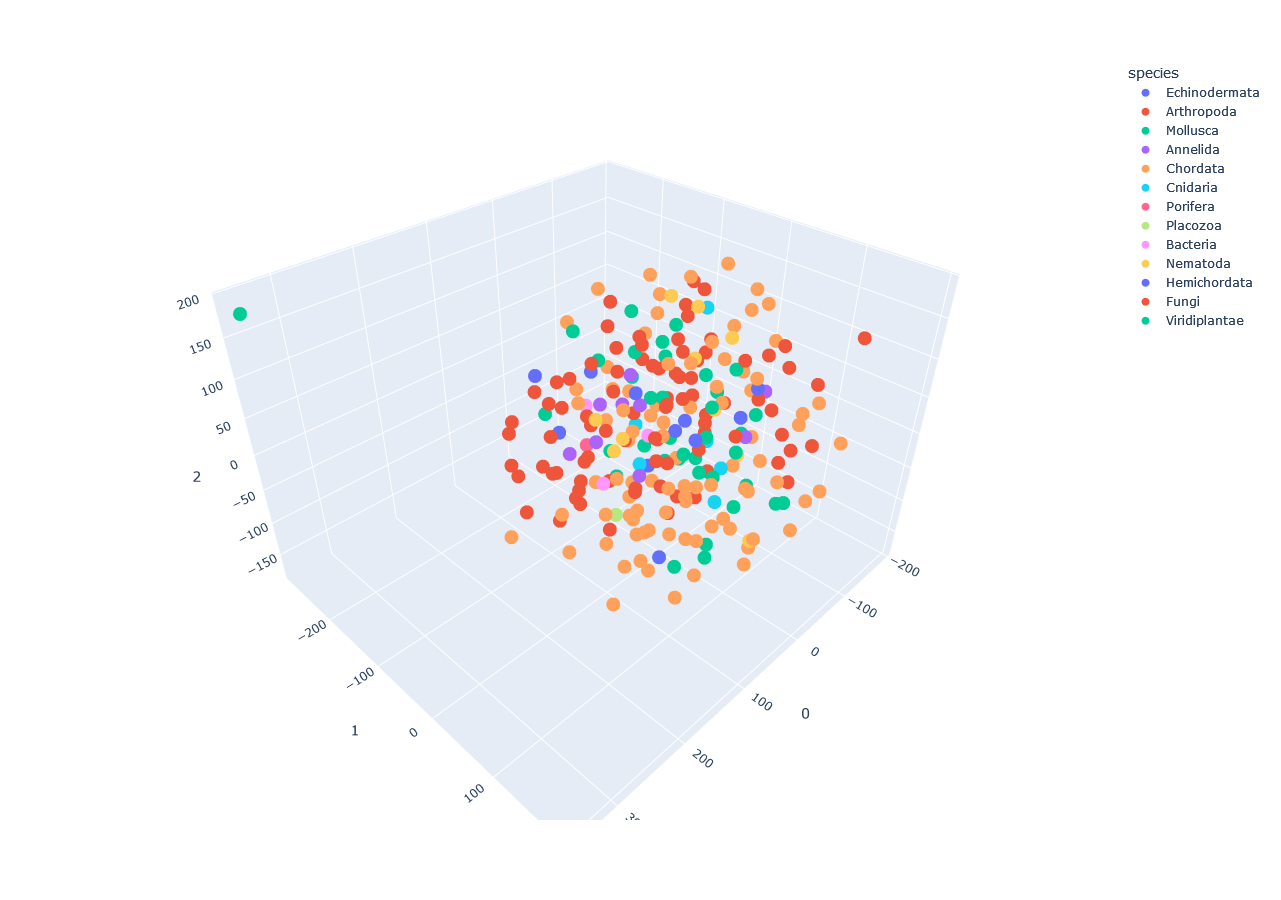

In [7]:
tsne_3d = TSNE(n_components=3, random_state=0)
proj_tsne_dist_3d = tsne_3d.fit_transform(dist_matrix)

tsne_dist_3d = px.scatter_3d(
    proj_tsne_dist_3d, x=0, y=1, z=2,
    color=colour.Color_species, labels={'color': 'species'}
)
tsne_dist_3d.update_traces(marker_size=8)
tsne_dist_3d.update_layout(xaxis_range=[-20, 20], yaxis_range=[-20, 20])
tsne_dist_3d.update_layout(width=1000, height=900)
tsne_dist_3d.update_xaxes(dtick=5)
tsne_dist_3d.show()

# UMAP

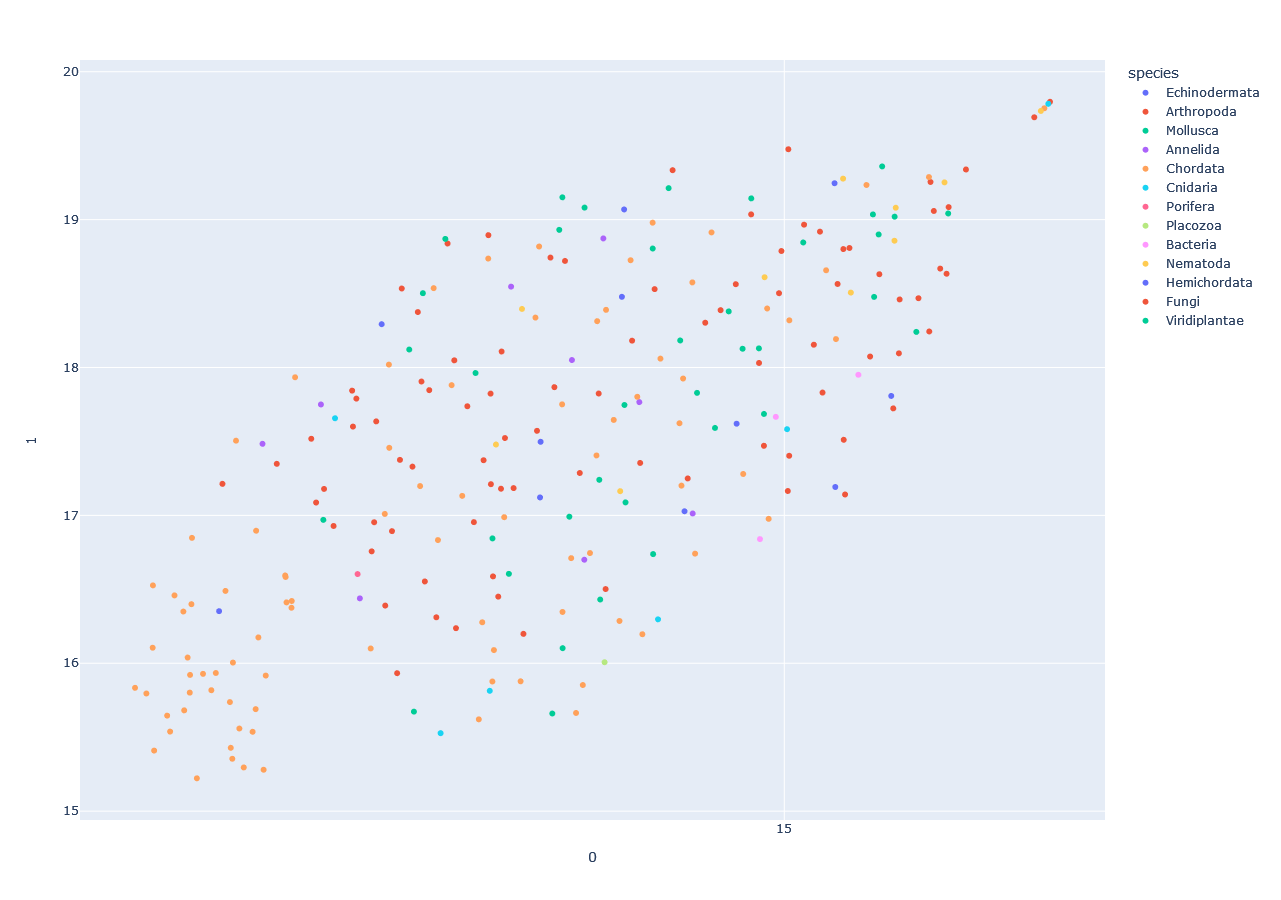

In [9]:
umap_phyl_2d = UMAP(n_components=2, random_state=0)
proj_umap_dist_2d = umap_phyl_2d.fit_transform(dist_matrix)

umap_dist_2d = px.scatter(
    proj_umap_dist_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)
#umap_dist_2d.update_layout(xaxis_range=[-20, 20], yaxis_range=[-20, 20])
umap_dist_2d.update_layout(width=1000, height=900)
umap_dist_2d.update_xaxes(dtick=5)
umap_dist_2d.show()

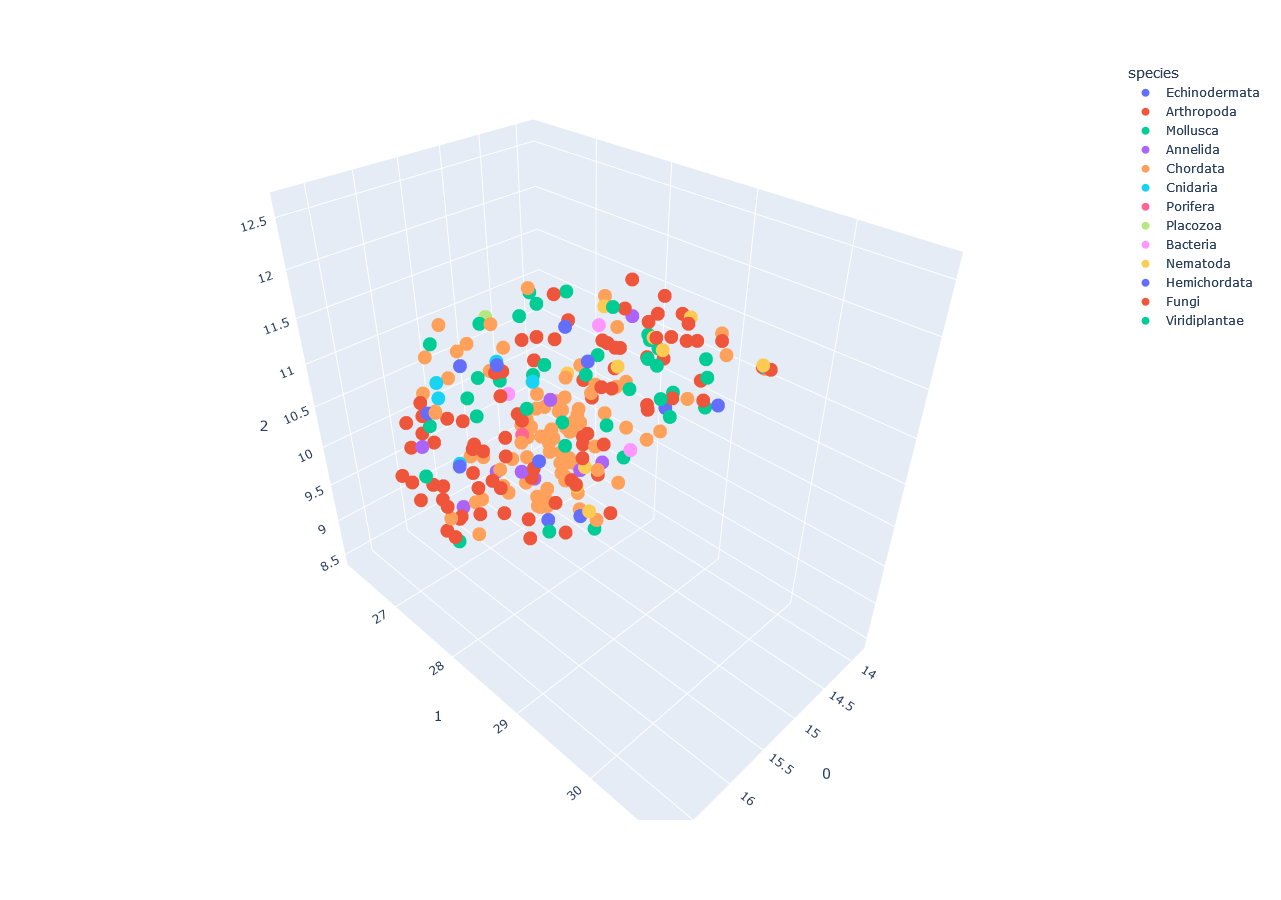

In [10]:
umap_3d = UMAP(n_components=3, random_state=0)
proj_umap_dist_3d = umap_3d.fit_transform(dist_matrix)

umap_dist_3d = px.scatter_3d(
    proj_umap_dist_3d, x=0, y=1, z=2,
    color=colour.Color_species, labels={'color': 'species'}
)
umap_dist_3d.update_traces(marker_size=8)
umap_dist_3d.update_layout(xaxis_range=[-20, 20], yaxis_range=[-20, 20])
umap_dist_3d.update_layout(width=1000, height=900)
umap_dist_3d.update_xaxes(dtick=5)
umap_dist_3d.show()

# Multi Dimensional Scaling

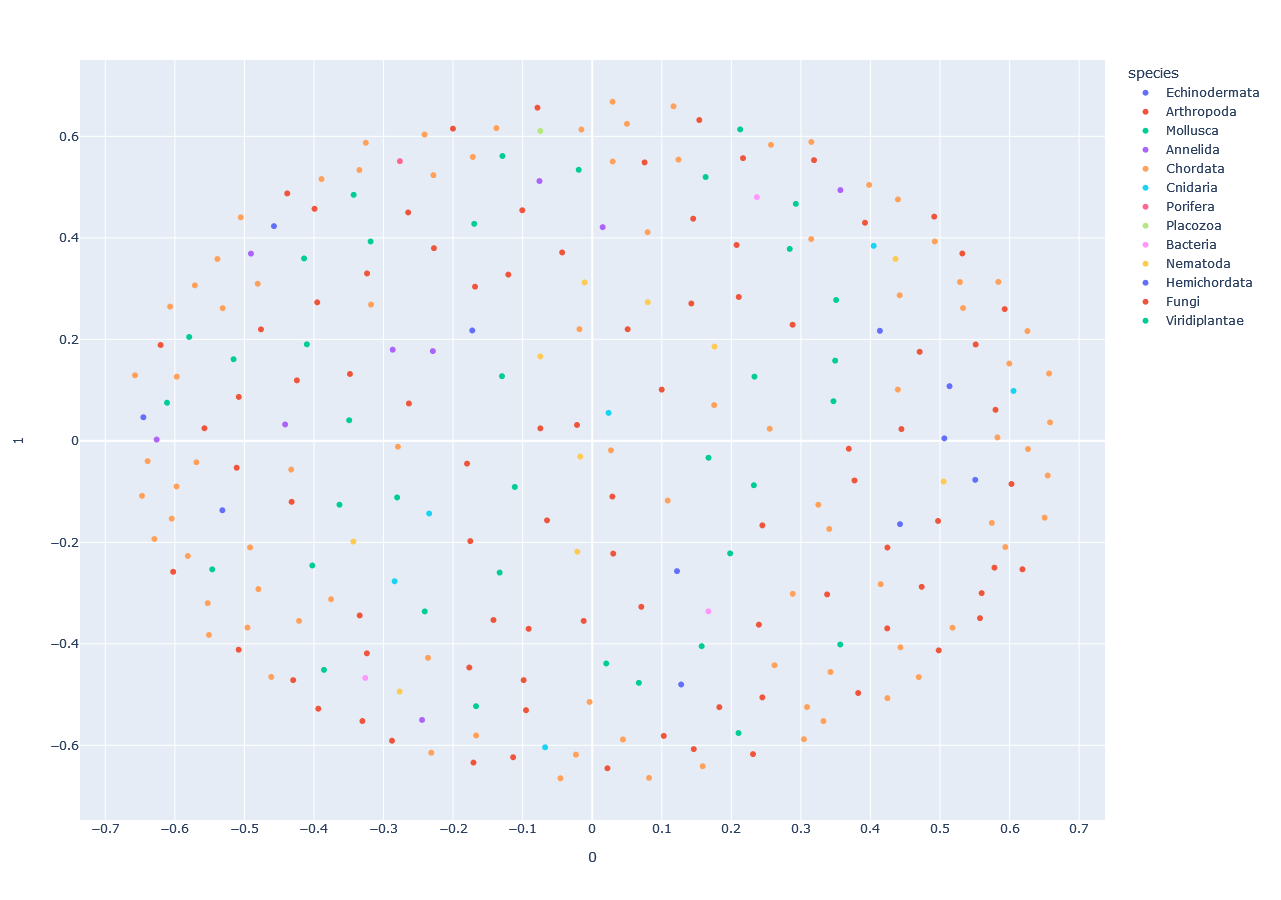

In [13]:
mds_dist_2d = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
proj_mds_dist_2d = mds_dist_2d.fit_transform(dist_matrix)


mds_dist_2d = px.scatter(
    proj_mds_dist_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)

#mds_dist_2d.update_layout(xaxis_range=[-0.04, 0.04], yaxis_range=[-0.04, 0.04])
mds_dist_2d.update_layout(width=1000, height=900)
mds_dist_2d.update_xaxes(dtick=0.1) #0.1 for other representations
mds_dist_2d.show()

# PCA

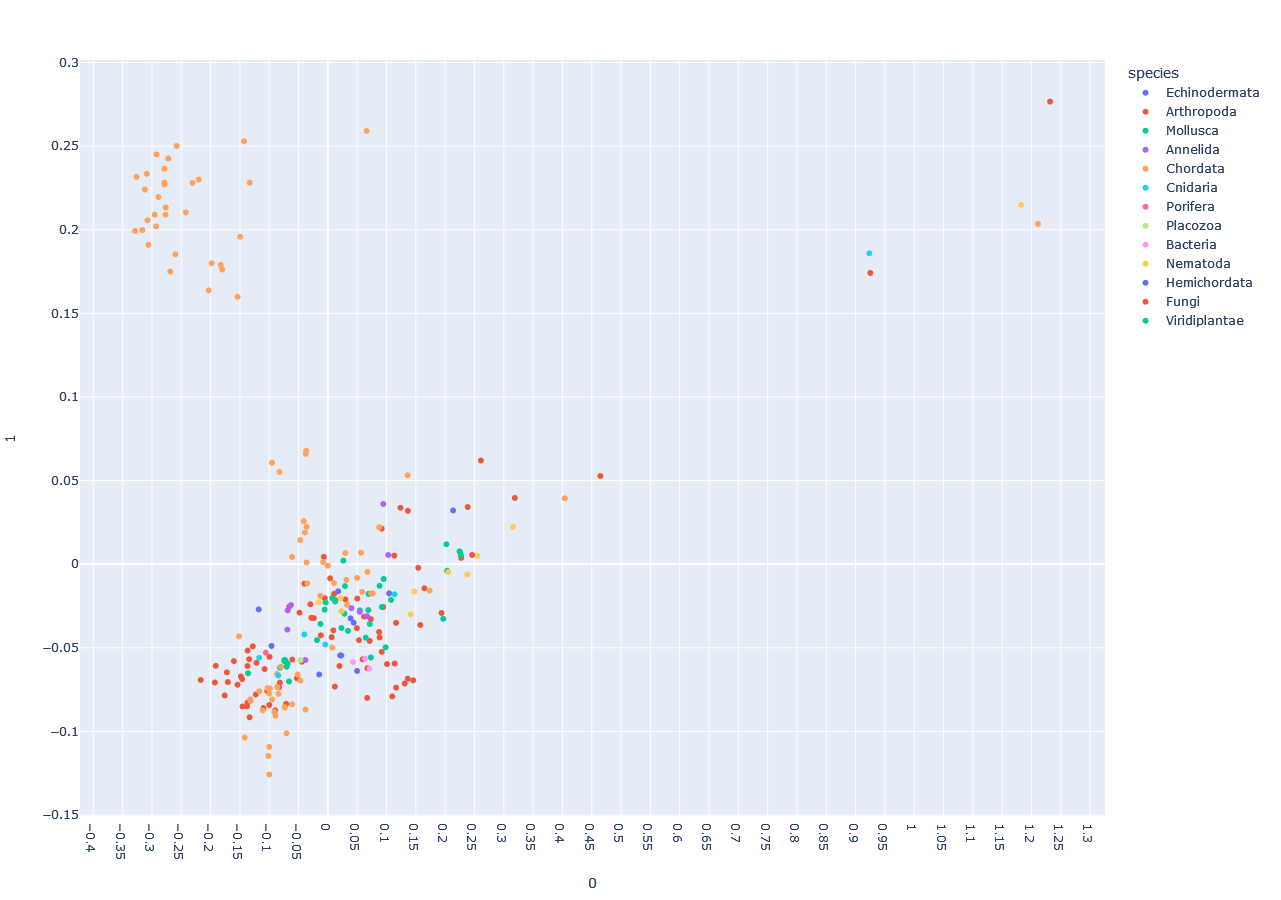

In [15]:
pca_dist_2d = PCA(n_components=2, random_state=0)
proj_pca_dist_2d = pca_dist_2d.fit_transform(dist_matrix)

pca_dist_2d = px.scatter(
    proj_pca_dist_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)

#pca_dist_2d.update_layout(xaxis_range=[-0.15, 0.2], yaxis_range=[-0.1, 0.15])
pca_dist_2d.update_layout(width=1000, height=900)
pca_dist_2d.update_xaxes(dtick=0.05)
pca_dist_2d.show()